In [44]:
import sys
import os

from IPython import display

import numpy as np
import scipy as sp

# our ROMs and FEM stuff
sys.path.append('..')
from fenics import XDMFFile, Mesh, Cell
from fenics import FunctionSpace, Function, Expression
import basix
from basix import ElementFamily, CellType, LagrangeVariant
from surrogates import NonlinearReducedBasisSurrogate as NRBS

from fenics import TestFunction, derivative, dot, inner, assemble, dx, grad

from scipy.integrate import solve_ivp

In [45]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

fig_dir = "figures/"
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

# rc('text', usetex=True)
# rc('font', size=16)
# rc('legend', fontsize=13)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

In [46]:
nu = 0.001
A = 0.5
t_start = 0.0
t_final = 0.5
t_steps = 501
ts = np.linspace(t_start, t_final, t_steps)

file_name = "output/burgers_1D/nu_" + str(nu) + "/FOM"
xdmffile = XDMFFile(file_name + ".xdmf")

mesh = Mesh()
xdmffile.read(mesh)
V = FunctionSpace(mesh, 'CG', 1)
X = V.tabulate_dof_coordinates()[:, 0]
u = Function(V)
N = V.dim()

u_ref = np.zeros((t_steps, N))
for i in range(t_steps):
    xdmffile.read_checkpoint(u, 'u', i)
    u_ref[i] = u.vector().get_local()

xdmffile.close()


# Compare LS-ROM different n

In [47]:
u_approx_LS_ROM_5 = np.genfromtxt('LS_ROM_intrusive/data/nu_0.001_sol_n_5.csv')
u_approx_LS_ROM_10 = np.genfromtxt('LS_ROM_intrusive/data/nu_0.001_sol_n_10.csv')
u_approx_LS_ROM_15 = np.genfromtxt('LS_ROM_intrusive/data/nu_0.001_sol_n_15.csv')
u_approx_LS_ROM_20 = np.genfromtxt('LS_ROM_intrusive/data/nu_0.001_sol_n_20.csv')

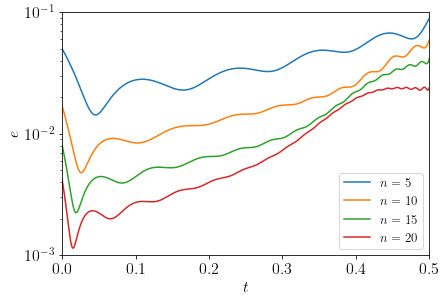

In [48]:
fig, ax = plt.subplots()
ax.semilogy(ts, np.linalg.norm(u_approx_LS_ROM_5 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='$n = 5$')
ax.semilogy(ts, np.linalg.norm(u_approx_LS_ROM_10 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='$n = 10$')
ax.semilogy(ts, np.linalg.norm(u_approx_LS_ROM_15 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='$n = 15$')
ax.semilogy(ts, np.linalg.norm(u_approx_LS_ROM_20 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='$n = 20$')

ax.set_xlabel("$t$")
ax.set_xlim(t_start, t_final)

ax.set_ylabel("$e$")
ax.set_ylim(1e-3, 1e-1)

ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'LS_ROM_trasient_err.png')
plt.show()

plt.close()

# Compare NM-ROM different n

In [49]:
u_approx_NM_ROM_5 = np.genfromtxt('NM_ROM_intrusive/data/nu_0.001_sol_n_5.csv')
u_approx_NM_ROM_10 = np.genfromtxt('NM_ROM_intrusive/data/nu_0.001_sol_n_10.csv')
u_approx_NM_ROM_15 = np.genfromtxt('NM_ROM_intrusive/data/nu_0.001_sol_n_15.csv')
u_approx_NM_ROM_20 = np.genfromtxt('NM_ROM_intrusive/data/nu_0.001_sol_n_20.csv')

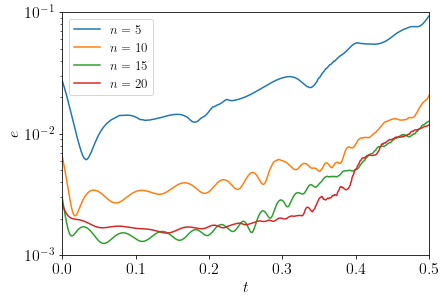

In [50]:
fig, ax = plt.subplots()
ax.semilogy(ts, np.linalg.norm(u_approx_NM_ROM_5 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='$n = 5$')
ax.semilogy(ts, np.linalg.norm(u_approx_NM_ROM_10 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='$n = 10$')
ax.semilogy(ts, np.linalg.norm(u_approx_NM_ROM_15 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='$n = 15$')
ax.semilogy(ts, np.linalg.norm(u_approx_NM_ROM_20 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='$n = 20$')

ax.set_xlabel("$t$")
ax.set_xlim(t_start, t_final)

ax.set_ylabel("$e$")
ax.set_ylim(1e-3, 1e-1)

ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'NM_ROM_trasient_err.png')
plt.show()

plt.close()

# Compare LS-ROM and NM-ROM

n = 5

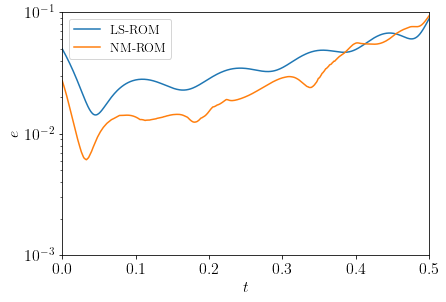

In [51]:
fig, ax = plt.subplots()

ax.semilogy(ts, np.linalg.norm(u_approx_LS_ROM_5 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='LS-ROM')
ax.semilogy(ts, np.linalg.norm(u_approx_NM_ROM_5 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='NM-ROM')

ax.set_xlabel("$t$")
ax.set_xlim(t_start, t_final)

ax.set_ylabel("$e$")
ax.set_ylim(1e-3, 1e-1)

ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_trasient_err_n_5.png')
plt.show()

plt.close()

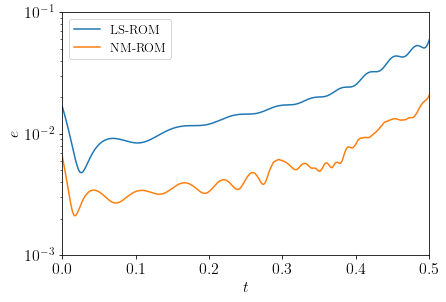

In [52]:
fig, ax = plt.subplots()

ax.semilogy(ts, np.linalg.norm(u_approx_LS_ROM_10 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='LS-ROM')
ax.semilogy(ts, np.linalg.norm(u_approx_NM_ROM_10 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='NM-ROM')

ax.set_xlabel("$t$")
ax.set_xlim(t_start, t_final)

ax.set_ylabel("$e$")
ax.set_ylim(1e-3, 1e-1)

ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_trasient_err_n_10.png')
plt.show()

plt.close()

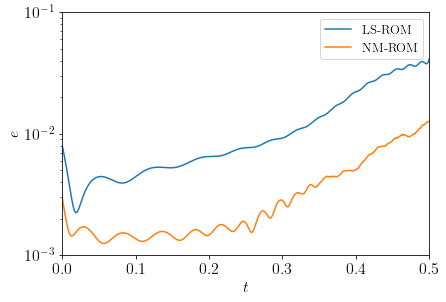

In [53]:
fig, ax = plt.subplots()

ax.semilogy(ts, np.linalg.norm(u_approx_LS_ROM_15 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='LS-ROM')
ax.semilogy(ts, np.linalg.norm(u_approx_NM_ROM_15 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='NM-ROM')

ax.set_xlabel("$t$")
ax.set_xlim(t_start, t_final)

ax.set_ylabel("$e$")
ax.set_ylim(1e-3, 1e-1)

ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_trasient_err_n_15.png')
plt.show()

plt.close()

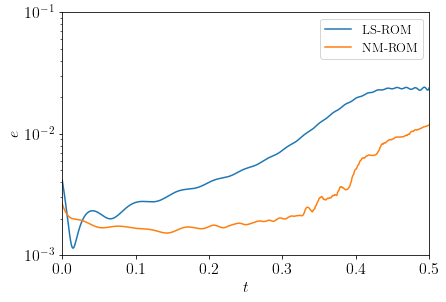

In [54]:
fig, ax = plt.subplots()

ax.semilogy(ts, np.linalg.norm(u_approx_LS_ROM_20 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='LS-ROM')
ax.semilogy(ts, np.linalg.norm(u_approx_NM_ROM_20 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1), label='NM-ROM')

ax.set_xlabel("$t$")
ax.set_xlim(t_start, t_final)

ax.set_ylabel("$e$")
ax.set_ylim(1e-3, 1e-1)

ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_trasient_err_n_20.png')
plt.show()

plt.close()

# Compare t = 0.1

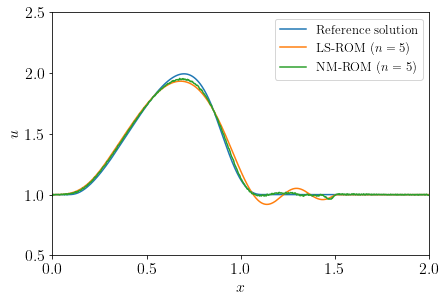

In [55]:
fig, ax = plt.subplots()

ax.plot(X, u_ref[100], label='Reference solution')
ax.plot(X, u_approx_LS_ROM_5[100], label='LS-ROM ($n = 5$)')
ax.plot(X, u_approx_NM_ROM_5[100], label='NM-ROM ($n = 5$)')

ax.set_xlabel("$x$")

ax.set_ylabel("$u$")
ax.set_ylim(0.5, 2.5)
ax.set_xlim(0, 2)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_t_0.1_n_5.png')
plt.show()

plt.close()

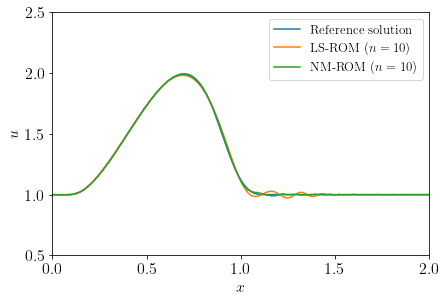

In [56]:
fig, ax = plt.subplots()

ax.plot(X, u_ref[100], label='Reference solution')
ax.plot(X, u_approx_LS_ROM_10[100], label='LS-ROM ($n = 10$)')
ax.plot(X, u_approx_NM_ROM_10[100], label='NM-ROM ($n = 10$)')

ax.set_xlabel("$x$")

ax.set_ylabel("$u$")
ax.set_ylim(0.5, 2.5)
ax.set_xlim(0, 2)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_t_0.1_n_10.png')
plt.show()

plt.close()

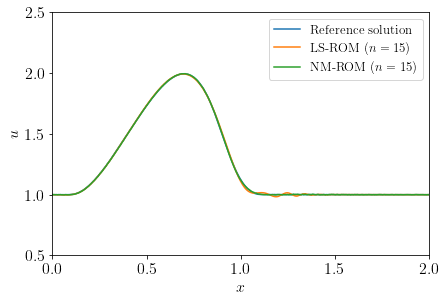

In [57]:
fig, ax = plt.subplots()

ax.plot(X, u_ref[100], label='Reference solution')
ax.plot(X, u_approx_LS_ROM_15[100], label='LS-ROM ($n = 15$)')
ax.plot(X, u_approx_NM_ROM_15[100], label='NM-ROM ($n = 15$)')

ax.set_xlabel("$x$")

ax.set_ylabel("$u$")
ax.set_ylim(0.5, 2.5)
ax.set_xlim(0, 2)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_t_0.1_n_15.png')
plt.show()

plt.close()

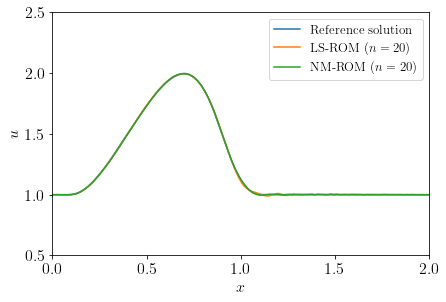

In [58]:
fig, ax = plt.subplots()

ax.plot(X, u_ref[100], label='Reference solution')
ax.plot(X, u_approx_LS_ROM_20[100], label='LS-ROM ($n = 20$)')
ax.plot(X, u_approx_NM_ROM_20[100], label='NM-ROM ($n = 20$)')

ax.set_xlabel("$x$")

ax.set_ylabel("$u$")
ax.set_ylim(0.5, 2.5)
ax.set_xlim(0, 2)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_t_0.1_n_20.png')
plt.show()

plt.close()

t = 0.4

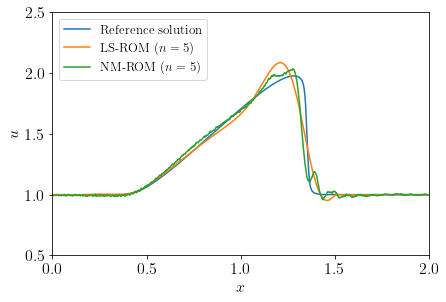

In [59]:
fig, ax = plt.subplots()

ax.plot(X, u_ref[400], label='Reference solution')
ax.plot(X, u_approx_LS_ROM_5[400], label='LS-ROM ($n = 5$)')
ax.plot(X, u_approx_NM_ROM_5[400], label='NM-ROM ($n = 5$)')

ax.set_xlabel("$x$")

ax.set_ylabel("$u$")
ax.set_ylim(0.5, 2.5)
ax.set_xlim(0, 2)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_t_0.4_n_5.png')
plt.show()

plt.close()

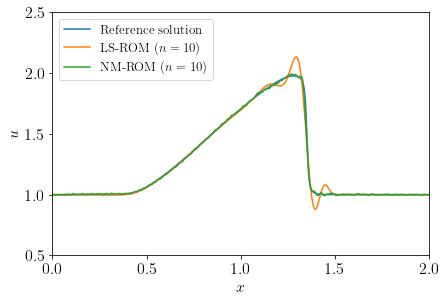

In [60]:
fig, ax = plt.subplots()

ax.plot(X, u_ref[400], label='Reference solution')
ax.plot(X, u_approx_LS_ROM_10[400], label='LS-ROM ($n = 10$)')
ax.plot(X, u_approx_NM_ROM_10[400], label='NM-ROM ($n = 10$)')

ax.set_xlabel("$x$")

ax.set_ylabel("$u$")
ax.set_ylim(0.5, 2.5)
ax.set_xlim(0, 2)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_t_0.4_n_10.png')
plt.show()

plt.close()

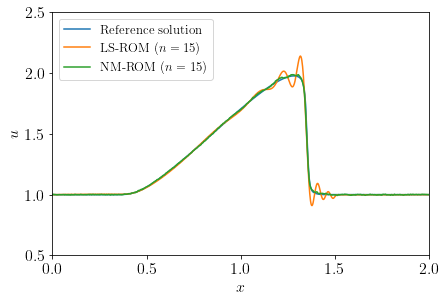

In [61]:
fig, ax = plt.subplots()

ax.plot(X, u_ref[400], label='Reference solution')
ax.plot(X, u_approx_LS_ROM_15[400], label='LS-ROM ($n = 15$)')
ax.plot(X, u_approx_NM_ROM_15[400], label='NM-ROM ($n = 15$)')

ax.set_xlabel("$x$")

ax.set_ylabel("$u$")
ax.set_ylim(0.5, 2.5)
ax.set_xlim(0, 2)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_t_0.4_n_15.png')
plt.show()

plt.close()

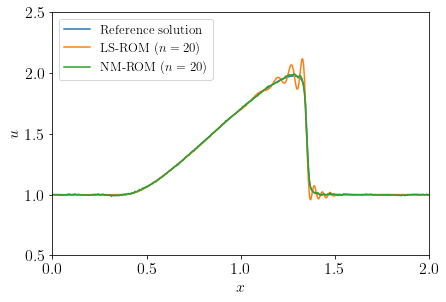

In [62]:
fig, ax = plt.subplots()

ax.plot(X, u_ref[400], label='Reference solution')
ax.plot(X, u_approx_LS_ROM_20[400], label='LS-ROM ($n = 20$)')
ax.plot(X, u_approx_NM_ROM_20[400], label='NM-ROM ($n = 20$)')

ax.set_xlabel("$x$")

ax.set_ylabel("$u$")
ax.set_ylim(0.5, 2.5)
ax.set_xlim(0, 2)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_t_0.4_n_20.png')
plt.show()

plt.close()

In [63]:
max_err_n_20_LS = max(np.linalg.norm(u_approx_LS_ROM_20 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1))
max_err_n_15_LS = max(np.linalg.norm(u_approx_LS_ROM_15 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1))
max_err_n_10_LS = max(np.linalg.norm(u_approx_LS_ROM_10 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1))
max_err_n_5_LS = max(np.linalg.norm(u_approx_LS_ROM_5 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1))

max_err_n_20_NM = max(np.linalg.norm(u_approx_NM_ROM_20 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1))
max_err_n_15_NM = max(np.linalg.norm(u_approx_NM_ROM_15 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1))
max_err_n_10_NM = max(np.linalg.norm(u_approx_NM_ROM_10 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1))
max_err_n_5_NM = max(np.linalg.norm(u_approx_NM_ROM_5 - u_ref, axis=1)/np.linalg.norm(u_ref, axis=1))

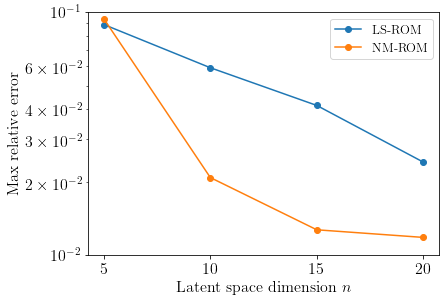

In [64]:
fig, ax = plt.subplots()

ns = [5,10,15,20]

max_errs_LS = [max_err_n_5_LS, max_err_n_10_LS, max_err_n_15_LS, max_err_n_20_LS]
max_errs_NM = [max_err_n_5_NM, max_err_n_10_NM, max_err_n_15_NM, max_err_n_20_NM]

ax.semilogy(ns, max_errs_LS, 'o-', label='LS-ROM')
ax.semilogy(ns, max_errs_NM, 'o-', label='NM-ROM')

ax.set_xlabel("Latent space dimension $n$")

ax.set_ylabel("Max relative error")
plt.xticks(ns)

ax.set_ylim(1e-2, 1e-1)
ax.legend()

ax.set_aspect("auto")

plt.tight_layout(pad=0)
plt.savefig(fig_dir + 'compare_max_err.png')
plt.show()

plt.close()